In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
iris = datasets.load_iris()
data = iris.data[0:100, 2:]
tr = iris.target[0:100]
tr_name = iris.target_names
cl = np.array(['red', 'green'])
#print(data, tr)

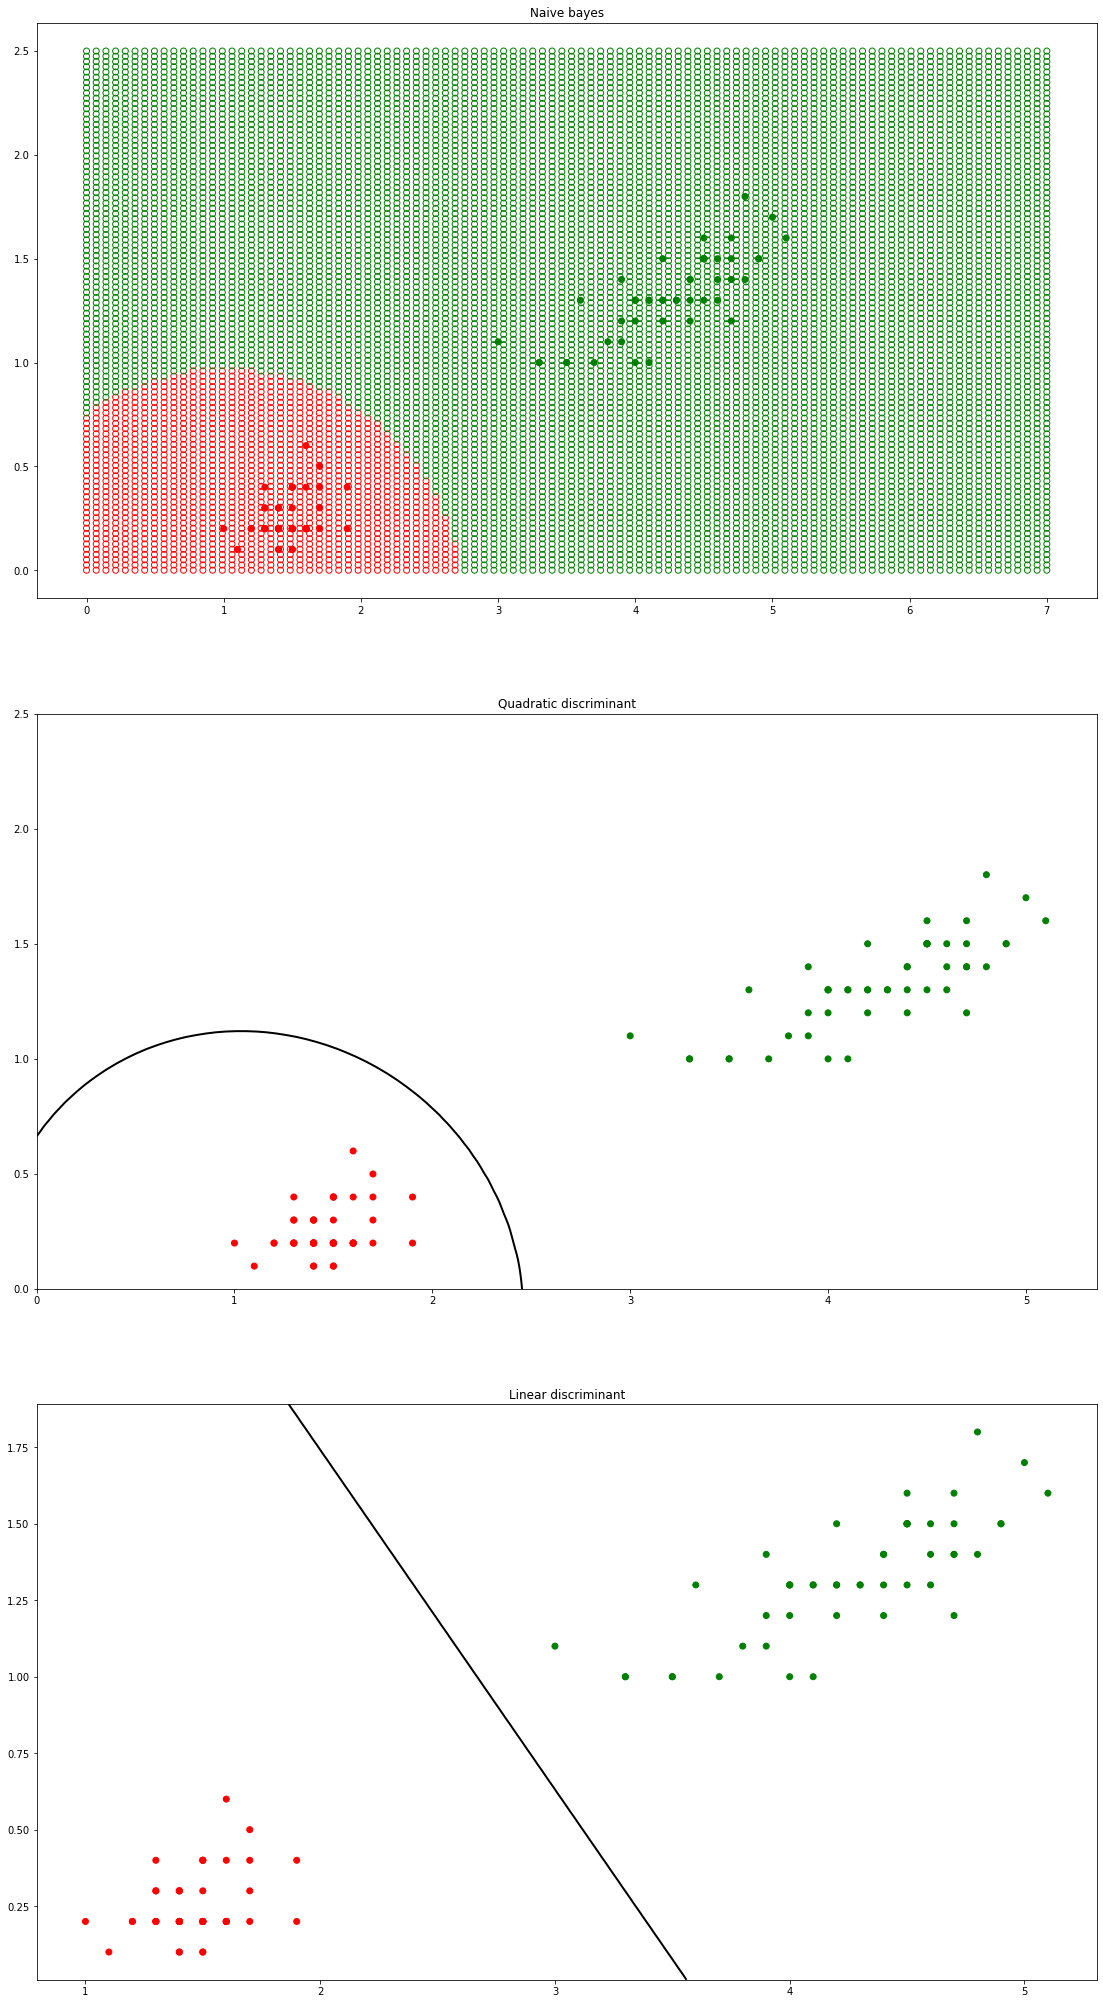

In [19]:
# Наивный байесовский классификатор
gnb = GaussianNB()
gnb.fit(data, tr)
# Квадратичный дискриминант (Plug-in)
qda = QuadraticDiscriminantAnalysis()
qda.fit(data, tr)
# ЛДФ
ldf = LinearDiscriminantAnalysis()
ldf.fit(data, tr)

# Размер поля (общий)
fig = plt.figure(figsize=(19,36))

ax_1 = fig.add_subplot(3, 1, 1)
ax_2 = fig.add_subplot(3, 1, 2)
ax_3 = fig.add_subplot(3, 1, 3)

# Поле 1
ax_1.scatter(data[:, 0], data[:, 1], color=cl[tr])

x_min, x_max = 0, 7
y_min, y_max = 0, 2.5

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                     np.linspace(y_min, y_max, 100))

g = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
ax_1.scatter(xx, yy, edgecolors=cl[g], facecolors='none')
ax_1.set_title('Naive bayes')

# Поле 2
ax_2.scatter(data[:, 0], data[:, 1], color=cl[tr])

x_min, x_max = 0, 5
y_min, y_max = 0, 2.5

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                     np.linspace(y_min, y_max, 100))

q = qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
q = q[:, 0].reshape(xx.shape)

ax_2.contour(xx, yy, q, [0.5], linewidths=2, colors='black')
ax_2.set_title('Quadratic discriminant')

# Поле 3
ax_3.scatter(data[:, 0], data[:, 1], color=cl[tr])

x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                     np.linspace(y_min, y_max, 100))

l = ldf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
l = l[:, 0].reshape(xx.shape)

ax_3.contour(xx, yy, l, [0.5], linewidths=2, colors='black')
ax_3.set_title('Linear discriminant')

plt.show()